In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

col_names=['Date','Open','High','Low','Close','Adj Close','Volume']
df=pd.read_csv("APPLE.csv",header=None, names=col_names)

df.head()

df=df.drop("Adj Close",axis=1)

df.head()

df=df.drop("Volume",axis=1)

df.head()

df['Open-Open'] = df['Open'] - df['Open'].shift(1)


df.head()

df=df.dropna()

df.head()

X=df.iloc[:,1:]

y = np.where (df['Close'].shift(-1) > df['Close'],1,-1)

split = int(0.7*len(df))

X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model = LogisticRegression()

model = model.fit (X_train,y_train)

probability = model.predict_proba(X_test)

print(probability)

y_pred = model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))





/home/gaurav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[0.56095051 0.43904949]
 [0.5842964  0.4157036 ]
 [0.46069909 0.53930091]
 [0.35517834 0.64482166]
 [0.35105943 0.64894057]
 [0.47241681 0.52758319]
 [0.44014157 0.55985843]
 [0.3631909  0.6368091 ]
 [0.42017544 0.57982456]
 [0.30230092 0.69769908]
 [0.47750349 0.52249651]
 [0.26604573 0.73395427]
 [0.42155433 0.57844567]
 [0.31222773 0.68777227]
 [0.49977409 0.50022591]
 [0.34028478 0.65971522]
 [0.3097074  0.6902926 ]
 [0.54210235 0.45789765]
 [0.29345355 0.70654645]
 [0.38737335 0.61262665]
 [0.44850311 0.55149689]
 [0.23730195 0.76269805]
 [0.30887037 0.69112963]
 [0.45807945 0.54192055]
 [0.31261913 0.68738087]
 [0.45504547 0.54495453]
 [0.28281303 0.71718697]
 [0.35767633 0.64232367]
 [0.32590361 0.67409639]
 [0.64949415 0.35050585]
 [0.48379221 0.51620779]
 [0.38013186 0.61986814]
 [0.59974486 0.40025514]
 [0.66568714 0.33431286]
 [0.68403545 0.31596455]
 [0.49840897 0.50159103]
 [0.57073043 0.42926957]
 [0.32124829 0.67875171]
 [0.44416775 0.55583225]
 [0.55196088 0.44803912]


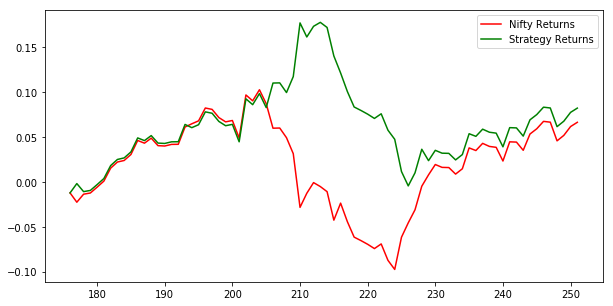

In [2]:
df['Predicted_Signal'] = model.predict(X)
df['Nifty_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])
df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [3]:
df.head(19)

,Date,Open,High,Low,Close,Open-Open,Predicted_Signal,Nifty_returns,Startegy_returns
1,2018-07-12,189.529999,191.410004,189.309998,191.029999,1.029999,1,NaN,NaN
2,2018-07-13,191.080002,191.839996,190.899994,191.330002,1.550003,1,0.001569,0.001569
3,2018-07-16,191.520004,192.649994,190.419998,190.910004,0.440002,1,-0.002198,-0.002198
4,2018-07-17,189.750000,191.869995,189.199997,191.449997,-1.770004,1,0.002825,0.002825
5,2018-07-18,191.779999,191.800003,189.929993,190.399994,2.029999,1,-0.005500,-0.005500
6,2018-07-19,189.690002,192.550003,189.690002,191.880005,-2.089997,1,0.007743,0.007743
7,2018-07-20,191.779999,192.429993,190.169998,191.440002,2.089997,1,-0.002296,-0.002296
8,2018-07-23,190.679993,191.960007,189.559998,191.610001,-1.100006,1,0.000888,0.000888
9,2018-07-24,192.449997,193.660004,192.050003,193.000000,1.770004,1,0.007228,0.007228
10,2018-07-25,193.059998,194.850006,192.429993,194.820007,0.610001,1,0.009386,0.009386
